# Exploring Iowa Liquor Sales
This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012. The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

In addition to being an excellent dataset for analyzing liquor sales, this is a large and clean public dataset of retail sales data. It can be used to explore problems like stockout prediction, retail demand forecasting, and other retail supply chain problems.

### 1. Problem Definition
> Explore the dataset and see if some useful information can be extracted

### 2. Data
The original dataset can be found [here](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=thinkmatch-proj&folder=&organizationId=).\
Table size: 5.47 GB\
Number of attributes: 24\
Number of instances: 20,546,005\
Last update: 2021-02-05 02:21:27

For this project, we will not use all of the instances, instead a small percent is enough. But how small are we talking about?\
* According to [this site](http://www.tools4dev.org/resources/how-to-choose-a-sample-size/#:~:text=A%20good%20maximum%20sample%20size%20is%20usually%20around%2010%25%20of,the%20maximum%20would%20be%201000.), "A good maximum sample size is around 10% of the population (our original number of instances) as long as it does not exceed 1000.\
10% of 20,546,005 is 2,054,600. So 1000 samples it is.

But there are more things to consider when getting samples: margin of error and confidence level.
* [This site](https://www.qualtrics.com/au/experience-management/research/determine-sample-size/?rid=ip&prevsite=en&newsite=au&geo=ID&geomatch=au) lets you calculate quickly how many samples do we need. We will put 95% confidence and +-2% margin error. As a result, we get **2401** ideal sample size.

### 3. Features
* **invoice_and_item_number**: Concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order.
* **date**: Date of order.
* **store_number**: Unique number assigned to the store who ordered the liquor.
* **store_name**: Name of store who ordered the liquor.
* **address**: Address of store who ordered the liquor.
* **city**: City where the store who ordered the liquor is located
* **zip_code**: Zip code where the store who ordered the liquor is located
* **store_location**: Location of store who ordered the liquor. The Address, City, State and Zip Code are geocoded to provide geographic coordinates. Accuracy of geocoding is dependent on how well the address is interpreted and the completeness of the reference data used.
* **county_number**: Iowa county number for the county where store who ordered the liquor is located
* **county**: County where the store who ordered the liquor is located
* **category**: Category code associated with the liquor ordered
* **category_name**: Category of the liquor ordered.
* **vendor_number**: The vendor number of the company for the brand of liquor ordered
* **vendor_name**: The vendor name of the company for the brand of liquor ordered
* **item_number**: Item number for the individual liquor product ordered.
* **item_description**: Description of the individual liquor product ordered.
* **pack**: The number of bottles in a case for the liquor ordered
* **bottle_volume_ml**: Volume of each liquor bottle ordered in milliliters.
* **state_bottle_cost**: The amount that Alcoholic Beverages Division paid for each bottle of liquor ordered
* **state_bottle_retail**: The amount the store paid for each bottle of liquor ordered
* **bottles_sold**: The number of bottles of liquor ordered by the store
* **sale_dollars**: Total cost of liquor order (number of bottles multiplied by the state bottle retail)
* **volume_sold_liters**: Total volume of liquor ordered in liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000)
* **volume_sold_gallons**: Total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784)

# Loading the Data

In [1]:
import os
from google.cloud import bigquery

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'D:/mlearning-proj/project/exploring-iowa-liquor-sales/Thinkmatch-proj-eb4ed729aecb.json'

In [2]:
client = bigquery.Client()

We are going to use the first 2401 instances from our original dataset.

In [3]:
QUERY = (
    'SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` '
    'LIMIT 2401')
query_job = client.query(QUERY)

In [4]:
df = query_job.to_dataframe()
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S22018800019,2014-10-27,4845,3rd St Convenience,"216, 3RD ST SE",CEDAR RAPIDS,52401,POINT (-91.666081 41.977896),57,Linn,...,874,The Glenlivet w/50ml 15YR & 18YR,6,850,20.99,32.24,2,64.48,1.70,0.45
1,S20506900110,2014-08-06,2524,Hy-Vee Food Store / Dubuque,3500 DODGE ST,DUBUQUE,52001,None,31,Dubuque,...,52314,Christian Bros Brandy,24,375,3.23,4.85,5,24.25,1.88,0.50
2,S05881400101,2012-06-05,2522,Hy-Vee Wine and Spirits / Spirit Lak,HWY 9 & 71,SPIRIT LAKE,51360,None,30,Dickinson,...,86310,La Prima Triple Sec,12,1000,2.66,3.99,48,191.52,48.00,12.68
3,S08343200031,2012-10-15,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,Polk,...,15627,Jameson,12,1000,17.40,26.10,60,1566.00,60.00,15.85
4,INV-00068500063,2016-08-31,2623,Hy-Vee Food Store #4 / Sioux City,2827 Hamilton Blvd,Sioux City,51104,POINT (-96.417783 42.519886),97,WOODBURY,...,34162,Belvedere Vodka,6,1000,20.63,30.95,2,185.70,2.00,0.52


# Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [6]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S22018800019,2014-10-27,4845,3rd St Convenience,"216, 3RD ST SE",CEDAR RAPIDS,52401,POINT (-91.666081 41.977896),57,Linn,...,874,The Glenlivet w/50ml 15YR & 18YR,6,850,20.99,32.24,2,64.48,1.70,0.45
1,S20506900110,2014-08-06,2524,Hy-Vee Food Store / Dubuque,3500 DODGE ST,DUBUQUE,52001,None,31,Dubuque,...,52314,Christian Bros Brandy,24,375,3.23,4.85,5,24.25,1.88,0.50
2,S05881400101,2012-06-05,2522,Hy-Vee Wine and Spirits / Spirit Lak,HWY 9 & 71,SPIRIT LAKE,51360,None,30,Dickinson,...,86310,La Prima Triple Sec,12,1000,2.66,3.99,48,191.52,48.00,12.68
3,S08343200031,2012-10-15,2190,"Central City Liquor, Inc.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77,Polk,...,15627,Jameson,12,1000,17.40,26.10,60,1566.00,60.00,15.85
4,INV-00068500063,2016-08-31,2623,Hy-Vee Food Store #4 / Sioux City,2827 Hamilton Blvd,Sioux City,51104,POINT (-96.417783 42.519886),97,WOODBURY,...,34162,Belvedere Vodka,6,1000,20.63,30.95,2,185.70,2.00,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,S17881500018,2014-03-13,4301,Sahota Food Mart,1805 SE 14TH ST,DES MOINES,50320,POINT (-93.59684900000002 41.57222),77,Polk,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,5,48.70,1.88,0.50
2397,INV-13789100065,2018-08-13,3762,Wine and Spirits Gallery,7690 Hickman Rd,Windsor Heights,50322,None,77,Polk,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,1,9.74,0.37,0.09
2398,INV-17948500059,2019-03-06,3920,Smokin' Joe's #11 Tobacco and Liquor Outlet,1606 Camanche Ave,Clinton,52732,POINT (-90.204748 41.827845),23,CLINTON,...,67524,Kahlua Coffee,24,375,6.49,9.74,3,29.22,1.12,0.29
2399,INV-14958100043,2018-10-10,3920,Smokin' Joe's #11 Tobacco and Liquor Outlet,1606 Camanche Ave,Clinton,52732,POINT (-90.204748 41.827845),23,CLINTON,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,1,9.74,0.37,0.09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  2401 non-null   object 
 1   date                     2401 non-null   object 
 2   store_number             2401 non-null   object 
 3   store_name               2401 non-null   object 
 4   address                  2395 non-null   object 
 5   city                     2395 non-null   object 
 6   zip_code                 2395 non-null   object 
 7   store_location           2165 non-null   object 
 8   county_number            2383 non-null   object 
 9   county                   2383 non-null   object 
 10  category                 2312 non-null   object 
 11  category_name            2300 non-null   object 
 12  vendor_number            2401 non-null   object 
 13  vendor_name              2401 non-null   object 
 14  item_number             

In [8]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,11.367763,927.020408,11.098455,16.655643,43.448980,627.433324,43.372020,11.456002
std,5.895347,2876.101706,33.449214,50.174684,94.812706,1518.193817,114.562362,30.264277
min,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.020000
25%,6.000000,750.000000,4.750000,7.130000,4.000000,42.560000,4.000000,1.050000
50%,12.000000,1000.000000,7.620000,11.430000,12.000000,189.000000,10.200000,2.690000
75%,12.000000,1000.000000,14.990000,22.490000,48.000000,661.200000,48.000000,12.680000
max,80.000000,140000.000000,1599.200000,2398.800000,1522.000000,26054.400000,2016.000000,532.570000


### Check Missing Values

In [9]:
df.isna().sum()

invoice_and_item_number      0
date                         0
store_number                 0
store_name                   0
address                      6
city                         6
zip_code                     6
store_location             236
county_number               18
county                      18
category                    89
category_name              101
vendor_number                0
vendor_name                  0
item_number                  0
item_description             0
pack                         0
bottle_volume_ml             0
state_bottle_cost            0
state_bottle_retail          0
bottles_sold                 0
sale_dollars                 0
volume_sold_liters           0
volume_sold_gallons          0
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1,S20506900110,2014-08-06,2524,Hy-Vee Food Store / Dubuque,3500 DODGE ST,DUBUQUE,52001,None,31,Dubuque,...,52314,Christian Bros Brandy,24,375,3.23,4.85,5,24.25,1.88,0.50
2,S05881400101,2012-06-05,2522,Hy-Vee Wine and Spirits / Spirit Lak,HWY 9 & 71,SPIRIT LAKE,51360,None,30,Dickinson,...,86310,La Prima Triple Sec,12,1000,2.66,3.99,48,191.52,48.00,12.68
7,INV-20823200083,2019-07-24,2522,Hy-Vee Wine and Spirits / Spirit Lake,Hwy 9 & 71,Spirit Lake,51360,None,30,DICKINSON,...,5037,Glenlivet 12YR,12,1000,28.98,43.47,6,260.82,6.00,1.58
14,S19356100121,2014-06-04,2625,Hy-Vee Wine and Spirits #2,3301 W KIMBERLY RD,DAVENPORT,52804,None,82,Scott,...,75087,Juarez Gold Dss,12,1000,4.76,7.14,108,771.12,108.00,28.53
18,S29791700006,2015-12-21,2535,Hy-Vee Food Store #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265,None,77,Polk,...,15739,2 Gingers,12,750,12.07,18.11,36,651.96,27.00,7.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,INV-26575300171,2020-04-15,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021,None,77,POLK,...,67524,Kahlua Coffee,24,375,6.49,9.74,3,29.22,1.12,0.29
2389,INV-28801300028,2020-07-17,2459,Reinhart Foods,200 State Po Box 98,Guthrie Center,50115,None,39,GUTHRIE,...,67524,Kahlua Coffee,24,375,6.49,9.74,1,9.74,0.37,0.09
2393,INV-15019200016,2018-10-12,4656,Casey's General Store #2301 / Ames,17005 Hwy 69,Ames,50010,None,85,STORY,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,3,29.22,1.12,0.29
2394,INV-14113400016,2018-08-28,3705,Liquor Locker,507 1st Ave #100,Rock Rapids,51246,None,60,LYON,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,1,9.74,0.37,0.09


In [11]:
df[df['store_location'].isna()].head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1,S20506900110,2014-08-06,2524,Hy-Vee Food Store / Dubuque,3500 DODGE ST,DUBUQUE,52001,None,31,Dubuque,...,52314,Christian Bros Brandy,24,375,3.23,4.85,5,24.25,1.88,0.50
2,S05881400101,2012-06-05,2522,Hy-Vee Wine and Spirits / Spirit Lak,HWY 9 & 71,SPIRIT LAKE,51360,None,30,Dickinson,...,86310,La Prima Triple Sec,12,1000,2.66,3.99,48,191.52,48.00,12.68
7,INV-20823200083,2019-07-24,2522,Hy-Vee Wine and Spirits / Spirit Lake,Hwy 9 & 71,Spirit Lake,51360,None,30,DICKINSON,...,5037,Glenlivet 12YR,12,1000,28.98,43.47,6,260.82,6.00,1.58
14,S19356100121,2014-06-04,2625,Hy-Vee Wine and Spirits #2,3301 W KIMBERLY RD,DAVENPORT,52804,None,82,Scott,...,75087,Juarez Gold Dss,12,1000,4.76,7.14,108,771.12,108.00,28.53
18,S29791700006,2015-12-21,2535,Hy-Vee Food Store #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265,None,77,Polk,...,15739,2 Gingers,12,750,12.07,18.11,36,651.96,27.00,7.13


In [12]:
df[df['address'].isna()].T

,869,1303,2117,2137,2152,2234
invoice_and_item_number,INV-00713600001,INV-00903100060,INV-07001800063,INV-06862800042,INV-20464600043,INV-20421200123
date,2016-10-05,2016-10-12,2017-08-31,2017-08-24,2019-07-08,2019-07-05
store_number,3909,3973,3420,3420,4320,4969
store_name,D And S Grocery,Mmdg Spirits / Ames,Sam's Club 6344 / Windsor Heights,Sam's Club 6344 / Windsor Heights,Fareway Stores #470 / Perry,Lake Liquors Wine and Spirits
address,None,None,None,None,None,None
city,None,None,None,None,None,None
zip_code,None,None,None,None,None,None
store_location,None,None,None,None,None,None
county_number,None,None,None,None,None,None
county,None,None,None,None,None,None


In [13]:
df['store_location']

0              POINT (-91.666081 41.977896)
1                                      None
2                                      None
3               POINT (-93.619787 41.60566)
4              POINT (-96.417783 42.519886)
                       ...                 
2396    POINT (-93.59684900000002 41.57222)
2397                                   None
2398           POINT (-90.204748 41.827845)
2399           POINT (-90.204748 41.827845)
2400           POINT (-93.162349 42.016845)
Name: store_location, Length: 2401, dtype: object

In [14]:
df['category_name'].value_counts().head(10)

DECANTERS & SPECIALTY PACKAGES         227
Triple Sec                             138
Coffee Liqueurs                        135
STRAIGHT RYE WHISKIES                  135
IRISH WHISKIES                         124
TRIPLE SEC                             113
Gold Rum                               108
Straight Rye Whiskies                   97
Imported Distilled Spirit Specialty     90
Special Order Items                     79
Name: category_name, dtype: int64

In [15]:
df[df['category_name'].isna()].head().T

,32,125,163,188,206
invoice_and_item_number,INV-02444300125,INV-12696500002,INV-13735300001,S14078700020,INV-09389800020
date,2016-12-28,2018-06-15,2018-08-08,2013-10-09,2017-12-21
store_number,3990,9002,3869,2508,2663
store_name,Cork and Bottle / Oskaloosa,Mississippi River Distillery,Bootleggin' Barzini's Fin,Hy-Vee Food Store #1 / Cedar Rapids,Hy-Vee Food Store / Douglas
address,309 A Ave West,303 N Cody Rd,412 1st Ave,"1843 JOHNSON AVENUE, N.W.",8701 Douglas
city,Oskaloosa,Leclaire,Coralville,CEDAR RAPIDS,Urbandale
zip_code,52577,52753,52241,52405,50322
store_location,POINT (-92.648153 41.296228),POINT (-90.34359400000001 41.599733),POINT (-91.565517 41.672672),POINT (-91.697941 41.97447),POINT (-93.739105 41.629364)
county_number,62,82,52,57,77
county,MAHASKA,Scott,JOHNSON,Linn,POLK


If we had the time, we will probably explore these missing values more and try to fill them with values that fit best. But for now, we will drop all the missing values.

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

In [18]:
len(df)

2061

Now that we don't have null values in my dataset, we will proceed to look further to each attribute

### Exploring Each Attribute

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  2061 non-null   object 
 1   date                     2061 non-null   object 
 2   store_number             2061 non-null   object 
 3   store_name               2061 non-null   object 
 4   address                  2061 non-null   object 
 5   city                     2061 non-null   object 
 6   zip_code                 2061 non-null   object 
 7   store_location           2061 non-null   object 
 8   county_number            2061 non-null   object 
 9   county                   2061 non-null   object 
 10  category                 2061 non-null   object 
 11  category_name            2061 non-null   object 
 12  vendor_number            2061 non-null   object 
 13  vendor_name              2061 non-null   object 
 14  item_number             

**invoice_and_item_number**

In [20]:
df['invoice_and_item_number'].sample(20)

1862       S24516800039
252     INV-23573700094
2374    INV-17378200025
433        S30017400065
1361       S08428100012
1509       S26985700009
1346       S17598900034
2377    INV-32325800107
2235    INV-23424000022
34         S26296300020
1093    INV-14451400001
1898    INV-20552600024
2312    INV-23624200005
805        S31760500025
1136    INV-25148400020
527     INV-23345900084
1171       S07328500110
912        S04725500100
1891       S31226200073
596     INV-30726500003
Name: invoice_and_item_number, dtype: object

In [21]:
df['invoice_and_item_number'].nunique()

2061

We won't be getting much from this attribute.

**date**

In [22]:
df['date']

0       2014-10-27
3       2012-10-15
4       2016-08-31
5       2016-08-29
6       2013-12-05
           ...    
2395    2019-05-03
2396    2014-03-13
2398    2019-03-06
2399    2018-10-10
2400    2019-08-27
Name: date, Length: 2061, dtype: object

We will extract year, month, day, and dayofweek from this attribute.

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date']

0      2014-10-27
3      2012-10-15
4      2016-08-31
5      2016-08-29
6      2013-12-05
          ...    
2395   2019-05-03
2396   2014-03-13
2398   2019-03-06
2399   2018-10-10
2400   2019-08-27
Name: date, Length: 2061, dtype: datetime64[ns]

In [25]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['day_of_week'] = df['date'].apply(lambda x: x.dayofweek)

In [26]:
df[['date', 'year', 'month', 'day', 'day_of_week']].head()

,date,year,month,day,day_of_week
0,2014-10-27,2014,10,27,0
3,2012-10-15,2012,10,15,0
4,2016-08-31,2016,8,31,2
5,2016-08-29,2016,8,29,0
6,2013-12-05,2013,12,5,3


Day of week:\
Monday=0\
Sunday=6

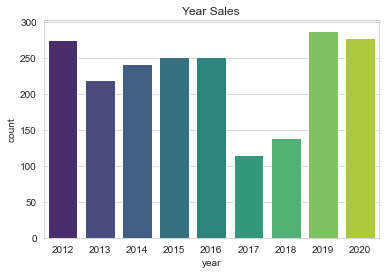

In [27]:
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Year Sales');

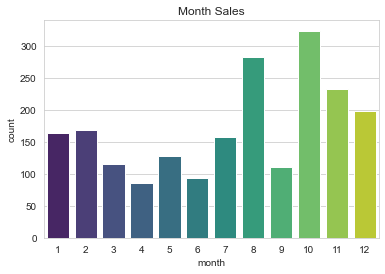

In [28]:
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Month Sales');

Mostly in the middle of summer in the US (August) and near winter.

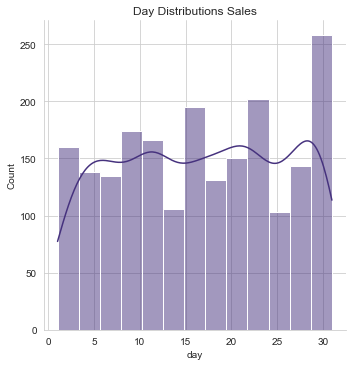

In [29]:
sns.displot(x='day', data=df, kde=True)
plt.title('Day Distributions Sales');

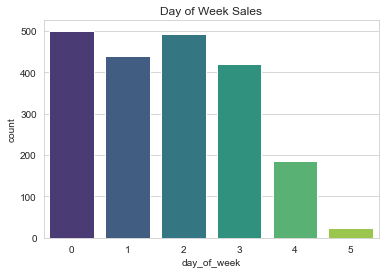

In [30]:
sns.countplot(x='day_of_week', data=df)
plt.title('Day of Week Sales');

Looks like there are no Sundays in our dataset.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**store_name**

In [32]:
df['store_name']

0                                3rd St Convenience
3                         Central City Liquor, Inc.
4                 Hy-Vee Food Store #4 / Sioux City
5                                 Audubon Food Land
6                           Wal-Mart 1787 / Carroll
                           ...                     
2395                  Super Stop and Shop / Baldwin
2396                               Sahota Food Mart
2398    Smokin' Joe's #11 Tobacco and Liquor Outlet
2399    Smokin' Joe's #11 Tobacco and Liquor Outlet
2400                  Hometown Foods / State Center
Name: store_name, Length: 2061, dtype: object

In [33]:
df['store_name'].nunique()

581

In [34]:
df['store_name'].value_counts().head()

Hy-Vee #3 / BDI / Des Moines      76
Central City 2                    74
Sam's Club 8162 / Cedar Rapids    50
Wilkie Liquors                    39
Central City Liquor, Inc.         36
Name: store_name, dtype: int64

**address**

In [35]:
df['address'].sample(20)

242              4064 E 53rd St
2297          1501 MICHIGAN AVE
36                 904 N 8TH ST
2353         1823 E KIMBERLY RD
1789              400 LOCUST ST
1938               904 N 8th St
2231           1745 MADISON AVE
738                1443 2nd AVE
1299    2605 BLAIRS FERRY RD NE
592             911 CENTRAL AVE
1616          1501 MICHIGAN AVE
789              305 AIRPORT RD
345              3425 INGERSOLL
2082                735 Main St
1755          1501 MICHIGAN AVE
1840             708 2ND AVE SE
10        7205 Mills Civic Pkwy
2230           802 SOUTH CENTER
356           1700 E Washington
1068          4349 Cumming Ave.
Name: address, dtype: object

In [36]:
df['address'].nunique()

735

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**city**

In [38]:
df['city'].sample(20)

2383            Altoona
1661             Newton
1264          Davenport
214          MASON CITY
1611               Ames
2253         DES MOINES
1342         Des Moines
1237     Council Bluffs
1286       CEDAR RAPIDS
189          Storm Lake
1857           ATLANTIC
388        CEDAR RAPIDS
492          Des Moines
571     WEST DES MOINES
1193        Spirit Lake
1403          DAVENPORT
1277             NEWTON
166     WEST DES MOINES
1005         Sioux City
1365         DES MOINES
Name: city, dtype: object

In [39]:
df['city'].nunique()

300

In [40]:
df['city'].value_counts().head()

DES MOINES      154
Des Moines      114
CEDAR RAPIDS     77
Cedar Rapids     73
DAVENPORT        57
Name: city, dtype: int64

For some reason, each value has an all-capitalized duplicate. We can solve this by change all values into lowercase.

In [41]:
df['city'] = df['city'].str.lower()

In [42]:
df['city'].value_counts().head()

des moines         268
cedar rapids       150
davenport           95
ames                89
west des moines     71
Name: city, dtype: int64

In [43]:
df['city'].nunique()

193

**zip_code**

In [44]:
df['zip_code'].sample(20)

453     50213
2272    50321
1905    50324
836     51501
1610    50320
1510    50314
740     52761
780     50208
411     50158
1624    50310
1842    50588
2128    52401
254     50317
783     50010
1919    50158
1915    52601
987     51501
876     50317
935     52404
934     52501
Name: zip_code, dtype: object

In [45]:
df['zip_code'].nunique()

228

**store_location**

In [46]:
df['store_location'].sample(20)

384                POINT (-96.37082 42.43407)
470              POINT (-92.277759 41.897052)
198     POINT (-92.899277 41.396961000000005)
950              POINT (-93.808855 41.598515)
20       POINT (-90.548919 41.55678100000001)
1478             POINT (-93.650131 42.021789)
108              POINT (-94.215446 43.292947)
1389             POINT (-94.017511 41.614114)
69               POINT (-90.688027 42.498279)
1306    POINT (-90.193204 41.836268000000004)
1667     POINT (-91.29083400000002 42.108203)
1266             POINT (-93.618911 42.022854)
2339              POINT (-92.47898 42.725694)
1973             POINT (-90.527081 41.559731)
46        POINT (-96.36432 42.43609000000001)
1310             POINT (-94.974011 42.421341)
973              POINT (-91.960918 41.994458)
1620              POINT (-90.48065 41.529655)
1914             POINT (-93.602851 41.627778)
1446             POINT (-93.235588 43.148451)
Name: store_location, dtype: object

Format: POINT (Longitude, Latitude)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**county**

In [48]:
df['county'].sample(20)

1978         STORY
343         Dallas
1638    Cerro Gord
219        Dubuque
458           POLK
1321          LINN
2263          POLK
269        Clinton
2349     Dickinson
320         Jasper
2079          LINN
2328          POLK
858     Black Hawk
1076        WARREN
715       Woodbury
538     Black Hawk
634          WAYNE
799           POLK
2069         STORY
2145       CLINTON
Name: county, dtype: object

In [49]:
df['county'].nunique()

163

In [50]:
df['county'].value_counts().head()

Polk     245
POLK     163
LINN     103
Linn      91
Scott     82
Name: county, dtype: int64

Same as the previous problem, each value has an all-capitalized duplicate. We can solve this by change all values into lowercase.

In [51]:
df['county'] = df['county'].str.lower()

In [52]:
df['county'].value_counts().head()

polk       408
linn       194
scott      133
johnson    114
story       94
Name: county, dtype: int64

In [53]:
df['county'].nunique()

94

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**category_name**

In [55]:
df['category_name'].sample(20)

2126    Imported Distilled Spirit Specialty
1946                        Coffee Liqueurs
1380                  STRAIGHT RYE WHISKIES
2368                        Coffee Liqueurs
197          DECANTERS & SPECIALTY PACKAGES
1371                  STRAIGHT RYE WHISKIES
1146                            JAMAICA RUM
755                 MISCELLANEOUS  BRANDIES
151                     Special Order Items
1298                             Triple Sec
2378                        Coffee Liqueurs
1751                         PEACH SCHNAPPS
1549                         IRISH WHISKIES
607                                  Mezcal
1745                  BUTTERSCOTCH SCHNAPPS
735                      SINGLE MALT SCOTCH
2311                  STRAIGHT RYE WHISKIES
2050                             TRIPLE SEC
1217                  Straight Rye Whiskies
1443                    BLACKBERRY BRANDIES
Name: category_name, dtype: object

In [56]:
df['category_name'].nunique()

60

In [57]:
df['category_name'].value_counts()

DECANTERS & SPECIALTY PACKAGES          204
Triple Sec                              126
Coffee Liqueurs                         122
STRAIGHT RYE WHISKIES                   121
IRISH WHISKIES                          113
TRIPLE SEC                              100
Gold Rum                                 98
Straight Rye Whiskies                    88
Imported Distilled Spirit Specialty      79
Special Order Items                      77
PEACH SCHNAPPS                           69
DISTILLED SPIRITS SPECIALTY              68
Single Malt Scotch                       67
100 PROOF VODKA                          65
American Vodka                           53
COFFEE LIQUEURS                          45
BLACKBERRY BRANDIES                      39
Temporary &  Specialty Packages          35
AMERICAN AMARETTO                        33
MISCELLANEOUS SCHNAPPS                   31
American Distilled Spirit Specialty      30
Neutral Grain Spirits Flavored           29
WATERMELON SCHNAPPS             

**vendor_name**

In [58]:
df['vendor_name'].sample(20)

147     Pernod Ricard USA/Austin Nichols
1391                 Wilson Daniels Ltd.
2232               Sazerac North America
1658                SAZERAC COMPANY  INC
39                   Park Street Imports
1616                      Luxco-St Louis
1671                   PERNOD RICARD USA
2169                           LUXCO INC
805                       Luxco-St Louis
1458                      Luxco-St Louis
2008                     Jim Beam Brands
837                SAZERAC NORTH AMERICA
266     Mississippi River Distilling Co.
509                SAZERAC NORTH AMERICA
1713                     Jim Beam Brands
2159                           LUXCO INC
877     Western Spirits Beverage Co. LLC
2326                 Wilson Daniels Ltd.
611                     Infinium Spirits
1096                SAZERAC COMPANY  INC
Name: vendor_name, dtype: object

In [59]:
df['vendor_name'].nunique()

84

In [60]:
df['vendor_name'].value_counts().head(30)

Jim Beam Brands                     330
Luxco-St Louis                      236
LUXCO INC                           202
Pernod Ricard USA/Austin Nichols    181
PERNOD RICARD USA                   140
Wilson Daniels Ltd.                 113
Infinium Spirits                     79
SAZERAC COMPANY  INC                 78
BACARDI USA INC                      75
Diageo Americas                      57
Sazerac Co., Inc.                    42
Mccormick Distilling Company         40
Sazerac North America                38
SAZERAC NORTH AMERICA                37
OLE SMOKY DISTILLERY LLC             28
MOET HENNESSY USA                    27
DIAGEO AMERICAS                      26
Heaven Hill Brands                   25
Moet Hennessy USA, Inc.              23
MHW Ltd                              19
Constellation Wine Company, Inc.     16
Brown-Forman Corporation             14
William Grant & Sons Inc             11
Phillips Beverage Company            11
Mississippi River Distilling Co.     10


In [61]:
df['vendor_name'] = df['vendor_name'].str.lower()

In [62]:
df['vendor_name'].value_counts().head(30)

jim beam brands                     330
luxco-st louis                      236
luxco inc                           202
pernod ricard usa/austin nichols    181
pernod ricard usa                   140
wilson daniels ltd.                 113
diageo americas                      83
infinium spirits                     79
sazerac company  inc                 78
sazerac north america                75
bacardi usa inc                      75
sazerac co., inc.                    42
mccormick distilling company         40
mhw ltd                              29
ole smoky distillery llc             28
moet hennessy usa                    27
heaven hill brands                   25
moet hennessy usa, inc.              23
constellation wine company, inc.     16
brown-forman corporation             14
proximo                              12
william grant & sons inc             11
phillips beverage company            11
mccormick distilling co.             10
mississippi river distilling co.     10


In [63]:
df['vendor_name'].nunique()

78

**item_description**

In [64]:
df['item_description'].sample(20)

2024                              Dekuyper Triple Sec
805                     Paramount Peppermint Schnapps
1919         Absolut w/2 Citron 50ml & 2 Mandrin 50ml
1730                               Dekuyper Hot Damn!
689                                Five O'clock Vodka
1210                                 Bacardi Gold Rum
1147                        Myers's Rum Original Dark
337     Roger Clynes Mexican Moonshine Silver Tequila
2159                               Paramount Sloe Gin
414                          Four Roses Single Barrel
2337                           Luksusowa Potato Vodka
517                       Firewater Cinnamon Schnapps
2141                               Paramount Sloe Gin
2064                               Paramount Gold Rum
1952                         Glenmorangie Taster Pack
990                          Arrow Spearmint Schnapps
1396                                    Templeton Rye
1542                                          Jameson
1081                        

In [65]:
df['item_description'].nunique()

402

In [66]:
df['item_description'].value_counts()

Templeton Rye                 112
Jameson                        92
Juarez Triple Sec              89
Juarez Gold Dss                63
Templeton 4YR Rye              63
                             ... 
Gentleman Jack w/2 Glasses      1
Gilbeys Vodka                   1
Jewel Of Russia Ultra           1
Dry Dock Sorghurm               1
Evan Williams Honey             1
Name: item_description, Length: 402, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**pack**

In [68]:
df['pack'].sample(20)

2314     6
2064    12
971     12
920     12
1505    12
945     24
864      6
678      6
1469    12
852     12
1553    12
1759    12
489     24
304     12
1583    12
603      6
1080    12
1248     8
1968    12
588     12
Name: pack, dtype: int64

In [69]:
df['pack'].nunique()

12

In [70]:
df['pack'].value_counts()

12    1285
6      546
24     126
10      36
8       25
48      16
3       10
4        8
1        4
20       2
30       2
15       1
Name: pack, dtype: int64

We will treat this attribute as object

**bottle_volume_ml**

In [71]:
df['bottle_volume_ml'].sample(20)

852     1000
1298    1000
908     1000
177      750
70       750
1516    1000
218      950
1558    1000
1400     750
1080     375
600      500
432      500
2266     750
1686    1000
1316    1000
1613    1000
862      750
1323    1000
383      750
794      375
Name: bottle_volume_ml, dtype: int64

In [72]:
df['bottle_volume_ml'].nunique()

22

In [73]:
df['bottle_volume_ml'].value_counts().head()

1000    969
750     558
375     138
1750    106
50       82
Name: bottle_volume_ml, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**state_bottle_cost**

In [75]:
df['state_bottle_cost']

0       20.99
3       17.40
4       20.63
5        7.84
6        7.01
        ...  
2395     6.49
2396     6.49
2398     6.49
2399     6.49
2400     6.49
Name: state_bottle_cost, Length: 2061, dtype: float64

In [76]:
df['state_bottle_cost'].nunique()

340

In [77]:
df['state_bottle_cost'].value_counts().head()

7.62     106
18.09     72
18.08     70
7.35      65
2.42      61
Name: state_bottle_cost, dtype: int64

**state_bottle_retail**

In [78]:
df['state_bottle_retail']

0       32.24
3       26.10
4       30.95
5       11.76
6       10.52
        ...  
2395     9.74
2396     9.74
2398     9.74
2399     9.74
2400     9.74
Name: state_bottle_retail, Length: 2061, dtype: float64

In [79]:
df['state_bottle_retail'].nunique()

353

In [80]:
df['state_bottle_retail'].value_counts().head()

11.43    106
27.14     72
27.13     70
3.63      61
11.02     58
Name: state_bottle_retail, dtype: int64

In [81]:
df[['state_bottle_cost', 'state_bottle_retail']].head(10)

,state_bottle_cost,state_bottle_retail
0,20.99,32.24
3,17.40,26.10
4,20.63,30.95
5,7.84,11.76
6,7.01,10.52
8,22.49,33.74
9,28.98,43.47
10,32.51,48.77
11,3.55,5.33
12,6.99,10.49


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

**bottles_sold**

In [83]:
df['bottles_sold']

0        2
3       60
4        2
5        3
6       18
        ..
2395     3
2396     5
2398     3
2399     1
2400     1
Name: bottles_sold, Length: 2061, dtype: int64

In [84]:
df['bottles_sold'].nunique()

69

In [85]:
df[['pack', 'bottles_sold']].sample(20)

,pack,bottles_sold
1896,12,5
1003,12,4
566,48,24
2085,12,60
217,6,18
94,12,120
227,24,18
619,12,4
401,12,60
1924,12,24


**sale_dollars**

In [86]:
df['sale_dollars']

0         64.48
3       1566.00
4        185.70
5         11.76
6        189.36
         ...   
2395      29.22
2396      48.70
2398      29.22
2399       9.74
2400       9.74
Name: sale_dollars, Length: 2061, dtype: float64

In [87]:
df['sale_dollars'].nunique()

882

**volume_sold_liters**

In [88]:
df['volume_sold_liters']

0        1.70
3       60.00
4        2.00
5        5.25
6       13.50
        ...  
2395     1.12
2396     1.88
2398     1.12
2399     0.37
2400     0.37
Name: volume_sold_liters, Length: 2061, dtype: float64

In [89]:
df['volume_sold_liters'].nunique()

138

In [90]:
df['volume_sold_liters'].value_counts()

4.00      319
2.00      127
13.50     112
27.00     107
60.00     104
         ... 
510.00      1
87.00       1
10.00       1
252.00      1
14.25       1
Name: volume_sold_liters, Length: 138, dtype: int64

**volume_sold_gallons**

In [91]:
df['volume_sold_gallons']

0        0.45
3       15.85
4        0.52
5        1.38
6        3.57
        ...  
2395     0.29
2396     0.50
2398     0.29
2399     0.09
2400     0.09
Name: volume_sold_gallons, Length: 2061, dtype: float64

In [92]:
df['volume_sold_gallons'].nunique()

153

In [93]:
df['volume_sold_gallons'].value_counts()

1.06      281
0.52      127
7.13      107
15.85     104
5.94       99
         ... 
66.57       1
21.39       1
161.67      1
6.60        1
0.23        1
Name: volume_sold_gallons, Length: 153, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2061 non-null   object        
 1   date                     2061 non-null   datetime64[ns]
 2   store_number             2061 non-null   object        
 3   store_name               2061 non-null   object        
 4   address                  2061 non-null   object        
 5   city                     2061 non-null   object        
 6   zip_code                 2061 non-null   object        
 7   store_location           2061 non-null   object        
 8   county_number            2061 non-null   object        
 9   county                   2061 non-null   object        
 10  category                 2061 non-null   object        
 11  category_name            2061 non-null   object        
 12  vendor_number            2061 non-

Now that we have briefly explored our data, we will drop some of these attributes and focus more on few numbers of attributes.

<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

In [95]:
df2 = df.copy()

In [96]:
df2.drop(['invoice_and_item_number',
          'date',
          'store_number',
          'address',
          'county_number',
          'category',
          'vendor_number',
          'item_number'], axis=1, inplace=True)

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2061 non-null   object 
 1   city                 2061 non-null   object 
 2   zip_code             2061 non-null   object 
 3   store_location       2061 non-null   object 
 4   county               2061 non-null   object 
 5   category_name        2061 non-null   object 
 6   vendor_name          2061 non-null   object 
 7   item_description     2061 non-null   object 
 8   pack                 2061 non-null   int64  
 9   bottle_volume_ml     2061 non-null   int64  
 10  state_bottle_cost    2061 non-null   float64
 11  state_bottle_retail  2061 non-null   float64
 12  bottles_sold         2061 non-null   int64  
 13  sale_dollars         2061 non-null   float64
 14  volume_sold_liters   2061 non-null   float64
 15  volume_sold_gallons  2061 non-null   f

What we have done so far:
* Extracted year, month, day, and day of week from `date`
* Lowercased `city`, `county`, and `vendor_name`
* Dropped `invoice_and_item_number`, `date`, `store_number`, `address`, `county_number`, `category`, `vendor_number`, `item_number`.

This data has many columns and sometimes it's hard to keep track of what we did or what we should do to the attribute. There's no header collapsing in Jupyter Notebook, so scrolling back and forth can also be quite tiring.

## Further Feature Engineering

In [98]:
import warnings
warnings.filterwarnings('ignore')

**store_name**

In [99]:
df2['store_name'].sample(20)

1155         Hy-Vee Food and Drug / Clinton
1013                      Benz Distributing
2206            Main Street Market Of Anita
2308            Costco Wholesale #788 / WDM
1133          Ingersoll Liquor and Beverage
787                          AJ'S LIQUOR II
1075    Hy-Vee Wine and Spirits / Iowa City
170     Hy-Vee Drugstore / University / DSM
2318                         Central City 2
2245            Hy-Vee Food Store / Carroll
1984             Sam's Club 6514 / Waterloo
1279                      North Scott Foods
500      Hy-Vee Drugstore #6 / Cedar Rapids
2353           Hy-Vee #3 Food and Drugstore
10              Costco Wholesale #788 / WDM
248                         D And S Grocery
300       Hy-Vee Wine & Spirits / Muscatine
280                   Cedar Ridge Vineyards
1604           Hy-Vee #3 / BDI / Des Moines
299       Sam's Club 6344 / Windsor Heights
Name: store_name, dtype: object

Most of the strings contain ([the store name][branch] # / [city]). We will split the strings and not include the city name.

In [100]:
df2['store_name'].nunique()

581

In [101]:
df2['store_name'] = df2['store_name'].str.lower()
df2['store_name'] = df2['store_name'].str.split(' / ').str[0]
df2['store_name'] = df2['store_name'].str.split('/').str[0]
df2['store_name'] = df2['store_name'].str.split(' #').str[0]

In [102]:
df2['store_name'].loc[df2.store_name.str.contains('hy-vee')] = 'hy-vee'
df2['store_name'].loc[df2.store_name.str.contains('central city')] = 'central city'
df2['store_name'].loc[df2.store_name.str.contains("sam's club")] = "sam's club"
df2['store_name'].loc[df2.store_name.str.contains('wal-mart')] = 'wal-mart'
df2['store_name'].loc[df2.store_name.str.contains('target')] = 'target'
df2['store_name'].loc[df2.store_name.str.contains('world liquor')] = 'world liquor & tobacco + vape'

In [103]:
df2['store_name'].value_counts().head(20)

hy-vee                           677
sam's club                       192
central city                     110
wal-mart                          86
fareway stores                    79
wilkie liquors                    39
costco wholesale                  35
benz distributing                 34
cyclone liquors                   26
smokin' joe's                     20
mmdg spirits                      17
keokuk spirits                    15
casey's general store             14
lot-a-spirits                     13
quick shop                        11
ingersoll liquor and beverage     11
sac liquor store                  10
sid's beverage shop               10
kum & go                          10
target                            10
Name: store_name, dtype: int64

In [104]:
df2['store_name'].nunique()

300

So far we've managed to reduce the unique values from 599 to 309. There are still so many instances with 1 value. There could be more duplicates, but for now, we've done what we could.

In [105]:
df2['store_name'].value_counts().tail(20)

indy 66 west                   1
cgi foods                      1
kari out wine & spirits llc    1
sara mini mart                 1
dewitt travel mart             1
council bluffs sinclair        1
super stop and shop            1
harolds jack n jill            1
avenue g store                 1
riverside casino and resort    1
liquor barn ii                 1
gasland                        1
mega saver                     1
hartig drug                    1
oasis                          1
schottsy's liquor              1
mill st liquor                 1
sahota food mart               1
downtown liquor                1
hartig drug company            1
Name: store_name, dtype: int64

**category_name**

In [106]:
df2['category_name'].nunique()

60

In [107]:
df2['category_name'] = df2['category_name'].str.lower()

In [108]:
df2['category_name'].nunique()

53

In [109]:
df2['category_name'].value_counts().head(10)

triple sec                             226
straight rye whiskies                  209
decanters & specialty packages         204
coffee liqueurs                        167
irish whiskies                         113
gold rum                                98
single malt scotch                      83
imported distilled spirit specialty     79
special order items                     77
peach schnapps                          69
Name: category_name, dtype: int64

We managed to reduce more unique values by lowering the characters.

**vendor_name**

In [110]:
df2['vendor_name'].nunique()

78

In [111]:
df2['vendor_name'].value_counts().head(45)

jim beam brands                         330
luxco-st louis                          236
luxco inc                               202
pernod ricard usa/austin nichols        181
pernod ricard usa                       140
wilson daniels ltd.                     113
diageo americas                          83
infinium spirits                         79
sazerac company  inc                     78
sazerac north america                    75
bacardi usa inc                          75
sazerac co., inc.                        42
mccormick distilling company             40
mhw ltd                                  29
ole smoky distillery llc                 28
moet hennessy usa                        27
heaven hill brands                       25
moet hennessy usa, inc.                  23
constellation wine company, inc.         16
brown-forman corporation                 14
proximo                                  12
william grant & sons inc                 11
phillips beverage company       

In [112]:
df2['vendor_name'].value_counts().tail(45)

s&b farms distillery                      6
disaronno international llc               5
dunkel corporation / iowa distilling      5
yahara bay distillers, inc                5
cedar ridge vineyards ll                  5
prestige wine and spirits group           5
park street imports                       5
sidney frank importing co.                4
fifth generation inc.                     4
stoli group                               4
yahara bay distillers inc                 4
ole smoky distillery, llc                 3
bacardi u.s.a., inc.                      3
phillips beverage                         3
skyy spirits inc                          3
mississippi river distil                  3
foundry distilling company, llc           3
green frog distillery, llc                2
the patron spirits company                2
w j deutsch & sons ltd                    2
gemini spirits                            2
s&b farmstead distillery                  2
jinro america inc               

This attribute is even worse. So many small differences like '&' and 'and' or one with a comma and not.

In [113]:
df2['vendor_name'].loc[df2.vendor_name.str.contains('luxco')] = 'luxco inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('pernod ricard usa')] = 'pernod ricard usa'
df2['vendor_name'].loc[df2.vendor_name.str.contains('gunsandmore')] = 'gunsandmore'
df2['vendor_name'].loc[df2.vendor_name.str.contains('mccormick distilling')] = 'mccormick distilling co'
df2['vendor_name'].loc[df2.vendor_name.str.contains('sazerac')] = 'sazerac company  inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('mississippi river')] = 'mississippi river distilling co'
df2['vendor_name'].loc[df2.vendor_name.str.contains('phillips beverage')] = 'phillips beverage company'
df2['vendor_name'].loc[df2.vendor_name.str.contains('constellation')] = 'constellation wine company'
df2['vendor_name'].loc[df2.vendor_name.str.contains('william grant')] = 'william grant & sons inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('cedar ridge vineyards')] = 'cedar ridge vineyards llc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('prestige wine')] = 'prestige wine & spirits group'
df2['vendor_name'].loc[df2.vendor_name.str.contains('ole smoky')] = 'ole smoky distillery'
df2['vendor_name'].loc[df2.vendor_name.str.contains('laird')] = 'laird & company'
df2['vendor_name'].loc[df2.vendor_name.str.contains('gallo winery')] = 'e & j gallo winery'
df2['vendor_name'].loc[df2.vendor_name.str.contains('s&b farms')] = 's&b farms distillery'
df2['vendor_name'].loc[df2.vendor_name.str.contains('fifth generation')] = 'fifth generation inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('yahara bay distillers')] = 'yahara bay distillers inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('bacardi')] = 'bacardi usa inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('forman')] = 'brown-forman corporation'
df2['vendor_name'].loc[df2.vendor_name.str.contains('dunkel corporation')] = 'dunkel corporation'

In [114]:
df2['vendor_name'].nunique()

60

We managed to reduce the unique values from 89 to 68.\
Note: This process was really tedious and need good eyes for spotting the duplicates and also not to mention, time. We might had missed some duplicates.

**item_description**

In [115]:
df2['item_description'].sample(40)

2311                                Templeton Rye
1856                   Dekuyper Watermelon Pucker
2287                                Templeton Rye
428                                  Barton Vodka
963                      Arrow Raspberry Schnapps
1215                             Bacardi Gold Rum
393                            Dekuyper Hot Damn!
1535                                      Jameson
1379                                Templeton Rye
1666                            Tortilla Gold Dss
1633                            Juarez Triple Sec
619                            Five O'clock Vodka
1835                   Dekuyper Watermelon Pucker
966                      Arrow Raspberry Schnapps
727                       Old St. Nick''s Egg Nog
988                               Juarez Gold Dss
1404                                Templeton Rye
973                               Juarez Gold Dss
761                   Paramount Blackberry Brandy
841                          Titos Handmade Vodka


In [116]:
df2['item_description'].nunique()

402

In [117]:
df2['item_description'] = df2['item_description'].str.lower()

In [118]:
df2['item_description'].nunique()

398

In [119]:
df2['category_name'].sample(30)

478                         100 proof vodka
670                     special order items
531                      root beer schnapps
2056                             triple sec
1456                      american amaretto
671                     special order items
998                      root beer schnapps
1816                         grape schnapps
505                          american vodka
1875                         peach schnapps
1688                    watermelon schnapps
441                      single malt scotch
369                         100 proof vodka
2382                         imported vodka
1625                             triple sec
1183                        coffee liqueurs
485                          imported vodka
1722                         peach schnapps
2237                        coffee liqueurs
123     imported distilled spirit specialty
1618                             triple sec
1212                         irish whiskies
74                      blackber

In [120]:
df2[['category_name', 'item_description']].head(30)

,category_name,item_description
0,decanters & specialty packages,the glenlivet w/50ml 15yr & 18yr
3,irish whiskies,jameson
4,imported vodka,belvedere vodka
5,gold rum,paramount gold rum
6,decanters & specialty packages,pinnacle w/3-50mls
8,temporary & specialty packages,crown royal multibrand advent calendar
9,single malt scotch,glenlivet 12yr
10,single malt scotch,glenfiddich 15 yr solera reserva
11,blackberry brandies,paramount blackberry brandy
12,miscellaneous brandies,calvados


In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2400
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2061 non-null   object 
 1   city                 2061 non-null   object 
 2   zip_code             2061 non-null   object 
 3   store_location       2061 non-null   object 
 4   county               2061 non-null   object 
 5   category_name        2061 non-null   object 
 6   vendor_name          2061 non-null   object 
 7   item_description     2061 non-null   object 
 8   pack                 2061 non-null   int64  
 9   bottle_volume_ml     2061 non-null   int64  
 10  state_bottle_cost    2061 non-null   float64
 11  state_bottle_retail  2061 non-null   float64
 12  bottles_sold         2061 non-null   int64  
 13  sale_dollars         2061 non-null   float64
 14  volume_sold_liters   2061 non-null   float64
 15  volume_sold_gallons  2061 non-null   f

In [122]:
df2[['store_name', 'city', 'zip_code', 'store_location', 'county', 'category_name', 'vendor_name', 'item_description']]

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description
0,3rd st convenience,cedar rapids,52401,POINT (-91.666081 41.977896),linn,decanters & specialty packages,pernod ricard usa,the glenlivet w/50ml 15yr & 18yr
3,central city,des moines,50314,POINT (-93.619787 41.60566),polk,irish whiskies,pernod ricard usa,jameson
4,hy-vee,sioux city,51104,POINT (-96.417783 42.519886),woodbury,imported vodka,moet hennessy usa,belvedere vodka
5,audubon food land,audubon,50025,POINT (-94.93625 41.723057),audubon,gold rum,luxco inc,paramount gold rum
6,wal-mart,carroll,51401,POINT (-94.893501 42.081312),carroll,decanters & specialty packages,jim beam brands,pinnacle w/3-50mls
...,...,...,...,...,...,...,...,...
2395,super stop and shop,baldwin,52207,POINT (-90.834314 42.073361),jackson,coffee liqueurs,pernod ricard usa,kahlua coffee
2396,sahota food mart,des moines,50320,POINT (-93.59684900000002 41.57222),polk,coffee liqueurs,pernod ricard usa,kahlua coffee liqueur
2398,smokin' joe's,clinton,52732,POINT (-90.204748 41.827845),clinton,coffee liqueurs,pernod ricard usa,kahlua coffee
2399,smokin' joe's,clinton,52732,POINT (-90.204748 41.827845),clinton,coffee liqueurs,pernod ricard usa,kahlua coffee liqueur


Now that we have cleaned our data, let's save the updated dataset into our local machine.

In [123]:
df2.to_csv('data-cleaned.csv', index=False)

<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

# Data Visualization

We did what we could to manipulate our data . But we haven't done any visualization on our data.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
df = pd.read_csv('data-cleaned.csv')
df.head()

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
0,3rd st convenience,cedar rapids,52401,POINT (-91.666081 41.977896),linn,decanters & specialty packages,pernod ricard usa,the glenlivet w/50ml 15yr & 18yr,6,850,20.99,32.24,2,64.48,1.70,0.45,2014,10,27,0
1,central city,des moines,50314,POINT (-93.619787 41.60566),polk,irish whiskies,pernod ricard usa,jameson,12,1000,17.40,26.10,60,1566.00,60.00,15.85,2012,10,15,0
2,hy-vee,sioux city,51104,POINT (-96.417783 42.519886),woodbury,imported vodka,moet hennessy usa,belvedere vodka,6,1000,20.63,30.95,2,185.70,2.00,0.52,2016,8,31,2
3,audubon food land,audubon,50025,POINT (-94.93625 41.723057),audubon,gold rum,luxco inc,paramount gold rum,6,1750,7.84,11.76,3,11.76,5.25,1.38,2016,8,29,0
4,wal-mart,carroll,51401,POINT (-94.893501 42.081312),carroll,decanters & specialty packages,jim beam brands,pinnacle w/3-50mls,6,750,7.01,10.52,18,189.36,13.50,3.57,2013,12,5,3


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2061 non-null   object 
 1   city                 2061 non-null   object 
 2   zip_code             2061 non-null   object 
 3   store_location       2061 non-null   object 
 4   county               2061 non-null   object 
 5   category_name        2061 non-null   object 
 6   vendor_name          2061 non-null   object 
 7   item_description     2061 non-null   object 
 8   pack                 2061 non-null   int64  
 9   bottle_volume_ml     2061 non-null   int64  
 10  state_bottle_cost    2061 non-null   float64
 11  state_bottle_retail  2061 non-null   float64
 12  bottles_sold         2061 non-null   int64  
 13  sale_dollars         2061 non-null   float64
 14  volume_sold_liters   2061 non-null   float64
 15  volume_sold_gallons  2061 non-null   f

In [128]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
count,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000,2061.000000
mean,11.270742,941.097040,11.170456,16.763256,46.954391,671.688292,47.404867,12.521436,2015.938379,7.244056,16.632703,1.718583
std,5.422666,3097.147654,35.930364,53.896534,100.677872,1601.163466,122.308779,32.310628,2.725569,3.521518,8.980479,1.331248
min,1.000000,50.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.020000,2012.000000,1.000000,1.000000,0.000000
25%,6.000000,750.000000,4.660000,6.990000,4.000000,44.080000,4.000000,1.060000,2014.000000,4.000000,9.000000,1.000000
50%,12.000000,1000.000000,7.620000,11.430000,18.000000,213.600000,13.500000,3.570000,2016.000000,8.000000,17.000000,2.000000
75%,12.000000,1000.000000,14.990000,22.490000,60.000000,685.800000,48.000000,12.680000,2019.000000,10.000000,24.000000,3.000000
max,48.000000,140000.000000,1599.200000,2398.800000,1522.000000,26054.400000,2016.000000,532.570000,2020.000000,12.000000,31.000000,5.000000


In [129]:
# sns.pairplot(df)

Pairplot is used to get the general plot of our data. The larger the data the longer it will take to proceed. Open the image in new tab to zoom in.

**sale_dollars vs bottles_sold**

<AxesSubplot:xlabel='sale_dollars', ylabel='bottles_sold'>

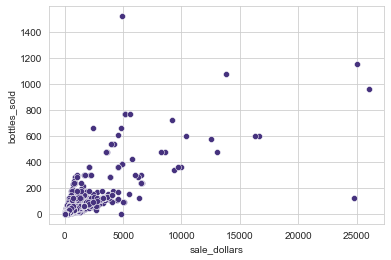

In [130]:
sns.scatterplot(x='sale_dollars', y='bottles_sold', data=df)

There are some outliers above 25000 dollars. Let's try to exclude these outliers to get a better look at our plot.

In [131]:
df[df['sale_dollars'] > 25000]

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
487,costco wholesale,coralville,52241,POINT (-91.61494100000002 41.698028),johnson,imported vodka,misa imports inc,kirkland signature french vodka,6,1750,14.48,21.72,1152,25021.44,2016.0,532.57,2017,12,12,1
1934,costco wholesale,west des moines,50266,POINT (-93.806489 41.561342),dallas,straight rye whiskies,wilson daniels ltd.,templeton rye,6,750,18.09,27.14,960,26054.40,720.0,190.20,2015,12,7,0


(0.0, 18500.0)

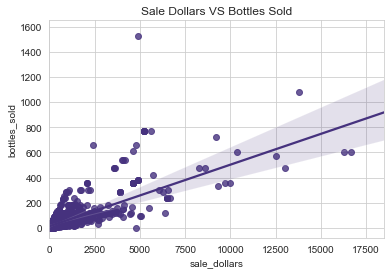

In [132]:
sns.regplot(x='sale_dollars', y='bottles_sold',
            data=df[df['sale_dollars'] < 25000])
plt.title('Sale Dollars VS Bottles Sold')
plt.xlim(0, 18500)

Text(0.5, 1.0, 'Sale Dollars VS Bottles Sold')

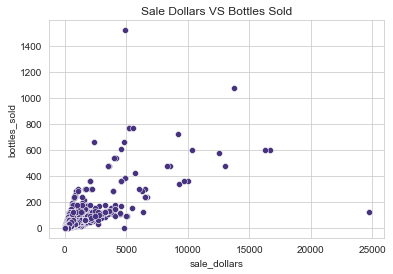

In [133]:
sns.scatterplot(x='sale_dollars', y='bottles_sold',
            data=df[df['sale_dollars'] < 25000])
plt.title('Sale Dollars VS Bottles Sold')

Text(0.5, 1.0, 'Sale Dollars VS Bottles Sold')

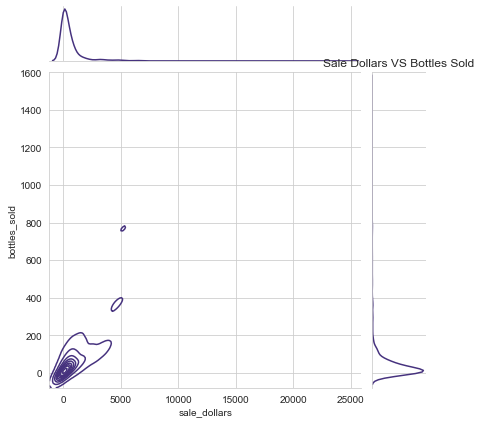

In [134]:
sns.jointplot(x='sale_dollars', y='bottles_sold',
              data=df[df['sale_dollars'] < 25000],
              kind='kde')
plt.title('Sale Dollars VS Bottles Sold')

**sale_dollars vs volume_sold_liters**

<AxesSubplot:xlabel='sale_dollars', ylabel='volume_sold_liters'>

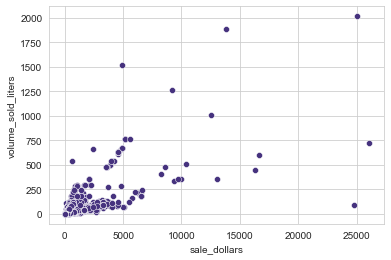

In [135]:
sns.scatterplot(x='sale_dollars', y='volume_sold_liters', data=df)

(0.0, 18500.0)

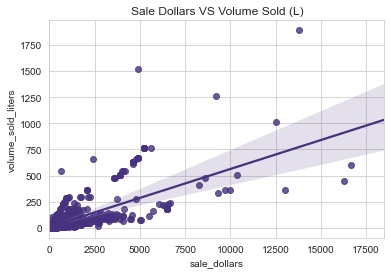

In [136]:
sns.regplot(x='sale_dollars', y='volume_sold_liters',
            data=df[df['sale_dollars'] < 25000])
plt.title('Sale Dollars VS Volume Sold (L)')
plt.xlim(0, 18500)

Text(0.5, 1.0, 'Sale Dollars VS Volume Sold (L)')

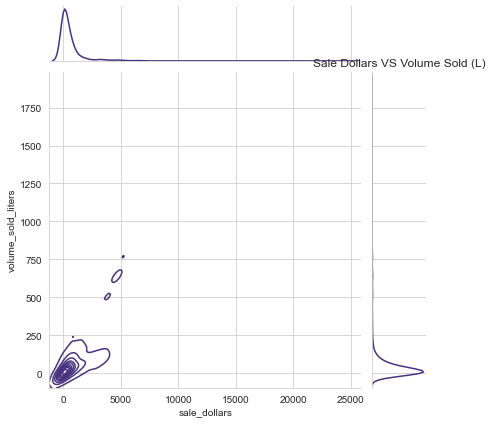

In [137]:
sns.jointplot(x='sale_dollars', y='volume_sold_liters',
              data=df[df['sale_dollars'] < 25000],
              kind='kde')
plt.title('Sale Dollars VS Volume Sold (L)')

The data is centered at relatively few bottles and cheap price.

**sale_dollars vs date objects**

Text(0.5, 1.0, 'Sale Dollars per Year')

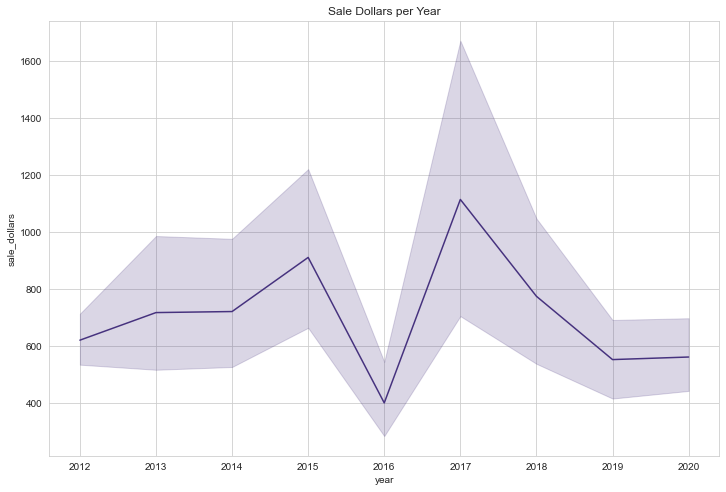

In [138]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='sale_dollars', data=df)
plt.title('Sale Dollars per Year')

What happened in 2016 and 2017?

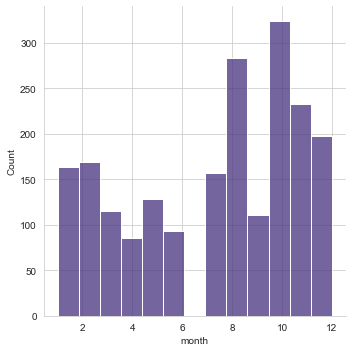

In [139]:
sns.displot(x='month', data=df)

In [140]:
df[df['month']==7].head()

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
62,hy-vee,iowa city,52240,POINT (-91.53046300000001 41.642764),johnson,flavored gin,3 badge corporation,sooh uncle vals botanical gin,6,750,17.50,26.25,60,1575.00,45.0,11.89,2017,7,10,0
110,hy-vee,waterloo,50702,POINT (-92.327917 42.459938),black hawk,single malt scotch,moet hennessy usa,glenmorangie 10 yr single malt scotch,6,750,19.99,29.99,30,899.70,22.5,5.94,2019,7,16,1
122,super stop 2,altoona,50009,POINT (-93.494642 41.65854),polk,single malt scotch,moet hennessy usa,glenmorangie pioneer pack,6,850,19.99,29.99,6,179.94,5.1,1.34,2019,7,30,1
165,okoboji avenue liquor,milford,51351,POINT (-95.149955 43.331525),dickinson,gold rum,luxco inc,paramount gold rum traveler,12,750,4.00,6.00,36,216.00,27.0,7.13,2017,7,19,2
168,hy-vee,pella,50219,POINT (-92.899277 41.396961000000005),marion,single malt scotch,pernod ricard usa,glenlivet 12yr,12,1000,28.98,43.47,2,86.94,2.0,0.52,2019,7,24,2


Not sure why there is no bar for month 7. Let's try to plot it with line.

Text(0.5, 1.0, 'Sale Dollars per Month')

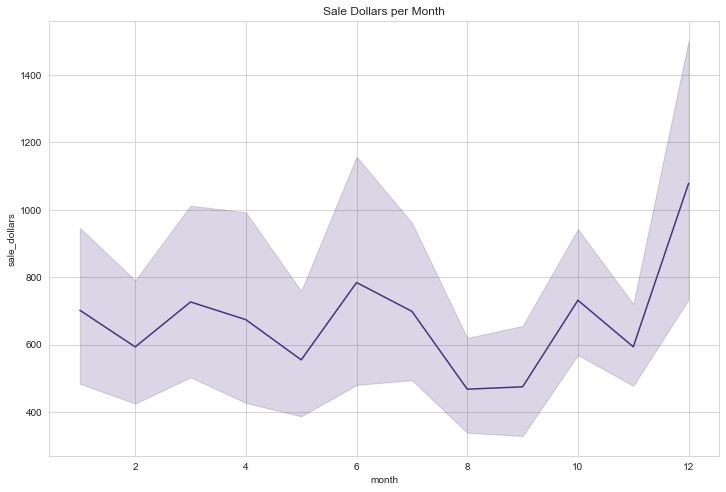

In [141]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='sale_dollars', data=df)
plt.title('Sale Dollars per Month')

The data per month is too spread out, but the general trend is that the average high sales is on October.

Text(0.5, 1.0, 'Sale Dollars per Day')

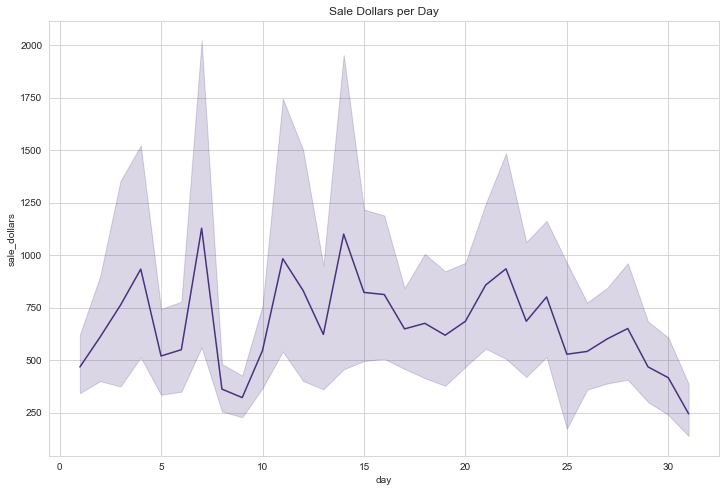

In [142]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='day', y='sale_dollars', data=df)
plt.title('Sale Dollars per Day')

Looks like the average high sales is at the start of the month or in the middle and going downhill towards the end. Guess this lines up with monthly salary.

Text(0.5, 0, 'day_of_week (mon=0, sun=6)')

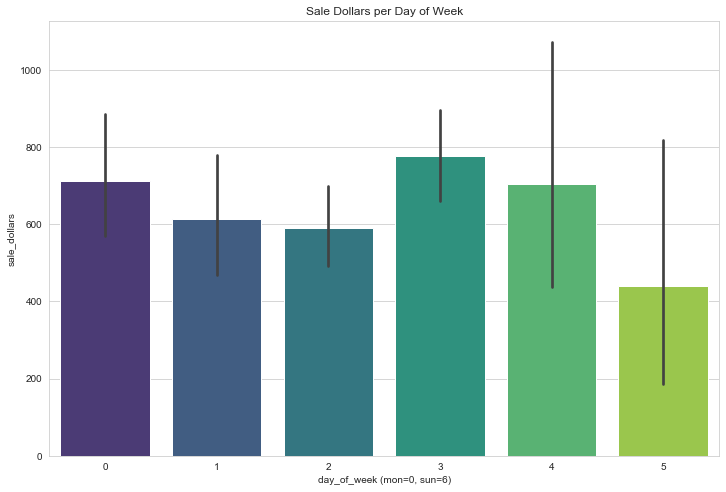

In [143]:
plt.figure(figsize=(12, 8))
sns.barplot(x='day_of_week', y='sale_dollars', data=df)
plt.title('Sale Dollars per Day of Week')
plt.xlabel('day_of_week (mon=0, sun=6)')

In [144]:
df[df['day_of_week']==6]

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week


Why are there no Sundays in our data?\
There is a law in USA called Blue Law. Many states prohibit selling alcohol for on and off-premises sales in one form or another on Sundays at some restricted time, under the idea that people should be in church on Sunday morning, or at least not drinking.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2061 non-null   object 
 1   city                 2061 non-null   object 
 2   zip_code             2061 non-null   object 
 3   store_location       2061 non-null   object 
 4   county               2061 non-null   object 
 5   category_name        2061 non-null   object 
 6   vendor_name          2061 non-null   object 
 7   item_description     2061 non-null   object 
 8   pack                 2061 non-null   int64  
 9   bottle_volume_ml     2061 non-null   int64  
 10  state_bottle_cost    2061 non-null   float64
 11  state_bottle_retail  2061 non-null   float64
 12  bottles_sold         2061 non-null   int64  
 13  sale_dollars         2061 non-null   float64
 14  volume_sold_liters   2061 non-null   float64
 15  volume_sold_gallons  2061 non-null   f

**Mapping store_location**

In [146]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

sns.set_style('white')

In [147]:
df['store_location']

0              POINT (-91.666081 41.977896)
1               POINT (-93.619787 41.60566)
2              POINT (-96.417783 42.519886)
3               POINT (-94.93625 41.723057)
4              POINT (-94.893501 42.081312)
                       ...                 
2056           POINT (-90.834314 42.073361)
2057    POINT (-93.59684900000002 41.57222)
2058           POINT (-90.204748 41.827845)
2059           POINT (-90.204748 41.827845)
2060           POINT (-93.162349 42.016845)
Name: store_location, Length: 2061, dtype: object

We'll download Iowa county boundaries data from [here](https://data.iowa.gov/Boundaries/County-Boundaries-of-Iowa/jda9-pbm6).

In [148]:
iowa = pd.read_csv('County_Boundaries_of_Iowa.csv')
iowa.head()

,GNIS Feature ID,FIPS County Code,State County Number,County Name,Geometry,Acres
0,465248,19119,60,Lyon,MULTIPOLYGON (((-96.59915441845389 43.50033354...,376538.0
1,465260,19143,72,Osceola,MULTIPOLYGON (((-95.86089025238238 43.49997867...,255640.2
2,465218,19059,30,Dickinson,MULTIPOLYGON (((-95.38780740566654 43.50024333...,258457.9
3,465220,19063,32,Emmet,MULTIPOLYGON (((-94.91475795884911 43.50086659...,257552.5
4,465283,19189,95,Winnebago,MULTIPOLYGON (((-93.97090631149868 43.49979007...,256789.0


In [149]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GNIS Feature ID      99 non-null     int64  
 1   FIPS County Code     99 non-null     int64  
 2   State County Number  99 non-null     int64  
 3   County Name          99 non-null     object 
 4   Geometry             99 non-null     object 
 5   Acres                99 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


What we should focus more is on `Geometry`. To use the attribute, we will need to convert the data type to geometry.

In [150]:
from shapely import wkt

iowa['Geometry'] = iowa['Geometry'].apply(wkt.loads)

In [151]:
iowa.set_geometry('Geometry')

,GNIS Feature ID,FIPS County Code,State County Number,County Name,Geometry,Acres
0,465248,19119,60,Lyon,"MULTIPOLYGON (((-96.59915 43.50033, -96.58647 ...",376538.0
1,465260,19143,72,Osceola,"MULTIPOLYGON (((-95.86089 43.49998, -95.84104 ...",255640.2
2,465218,19059,30,Dickinson,"MULTIPOLYGON (((-95.38781 43.50024, -95.37542 ...",258457.9
3,465220,19063,32,Emmet,"MULTIPOLYGON (((-94.91476 43.50087, -94.89795 ...",257552.5
4,465283,19189,95,Winnebago,"MULTIPOLYGON (((-93.97091 43.49979, -93.95230 ...",256789.0
...,...,...,...,...,...,...
94,465214,19051,26,Davis,"MULTIPOLYGON (((-92.63926 40.89896, -92.62026 ...",322813.6
95,465215,19053,27,Decatur,"MULTIPOLYGON (((-94.01480 40.89705, -93.99519 ...",341342.3
96,465281,19185,93,Wayne,"MULTIPOLYGON (((-93.55648 40.89838, -93.53804 ...",337169.4
97,465193,19007,4,Appanoose,"MULTIPOLYGON (((-93.09759 40.89823, -93.07897 ...",330047.6


In [152]:
iowa.set_geometry('Geometry').info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   GNIS Feature ID      99 non-null     int64   
 1   FIPS County Code     99 non-null     int64   
 2   State County Number  99 non-null     int64   
 3   County Name          99 non-null     object  
 4   Geometry             99 non-null     geometry
 5   Acres                99 non-null     float64 
dtypes: float64(1), geometry(1), int64(3), object(1)
memory usage: 4.8+ KB


<AxesSubplot:>

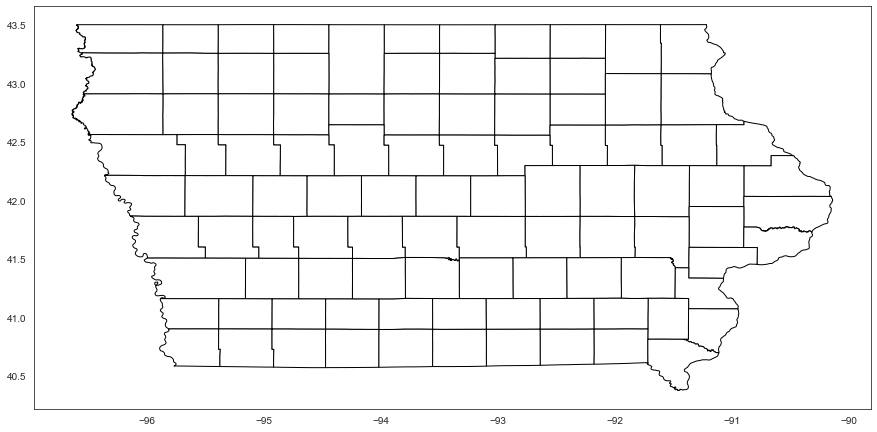

In [153]:
iowa.set_geometry('Geometry').plot(figsize=(15, 15), color='white', edgecolor='black')

Next, we need to place each point on the map.

In [154]:
coord = df['store_location'].str.strip().str[7:-1]
x = coord.str.split(' ').str[0]
y = coord.str.split(' ').str[1]

In [155]:
x[:5]

0    -91.666081
1    -93.619787
2    -96.417783
3     -94.93625
4    -94.893501
Name: store_location, dtype: object

In [156]:
y[:5]

0    41.977896
1     41.60566
2    42.519886
3    41.723057
4    42.081312
Name: store_location, dtype: object

In [157]:
crs = {'init':'epsg:4326'}

In [158]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(x, y))

<Figure size 1080x576 with 0 Axes>

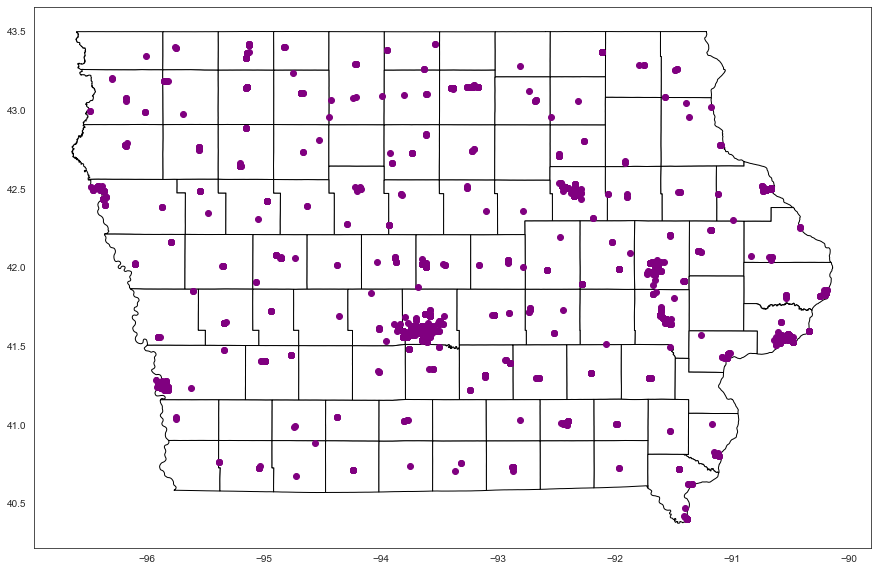

In [159]:
plt.figure(figsize=(15, 8))
ax = iowa.set_geometry('Geometry').plot(figsize=(15, 15), color='white', edgecolor='black')
geo_df.plot(ax=ax, color='purple')
plt.show()

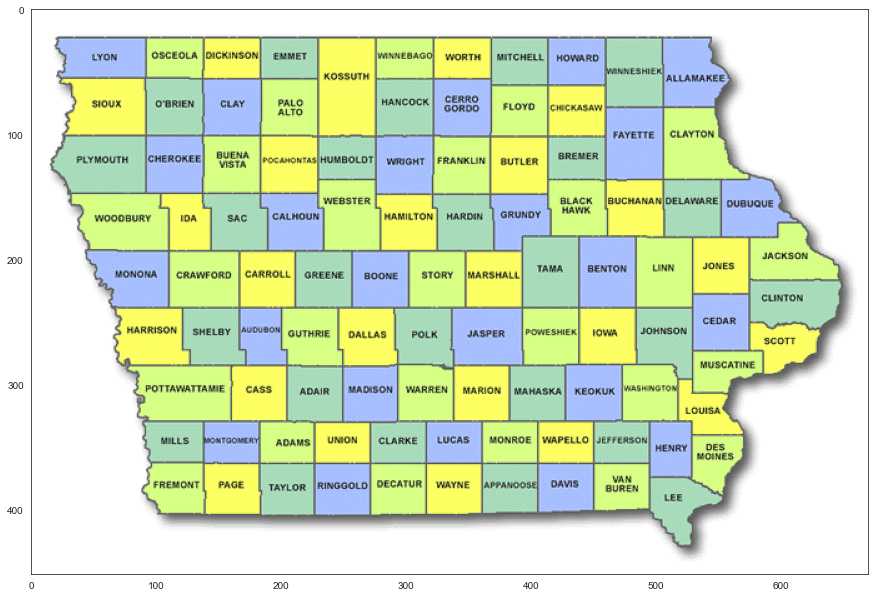

In [160]:
import matplotlib.image as mpimg

plt.figure(figsize=(15, 15))
plt.imshow(mpimg.imread('iowa_county_map.gif'))

Store locations are mostly in Polk.

In [161]:
sns.set_style('whitegrid')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   store_name           2061 non-null   object  
 1   city                 2061 non-null   object  
 2   zip_code             2061 non-null   object  
 3   store_location       2061 non-null   object  
 4   county               2061 non-null   object  
 5   category_name        2061 non-null   object  
 6   vendor_name          2061 non-null   object  
 7   item_description     2061 non-null   object  
 8   pack                 2061 non-null   int64   
 9   bottle_volume_ml     2061 non-null   int64   
 10  state_bottle_cost    2061 non-null   float64 
 11  state_bottle_retail  2061 non-null   float64 
 12  bottles_sold         2061 non-null   int64   
 13  sale_dollars         2061 non-null   float64 
 14  volume_sold_liters   2061 non-null   float64 
 15  volume_sold_gallons  

**sale_dollars vs object attributes**

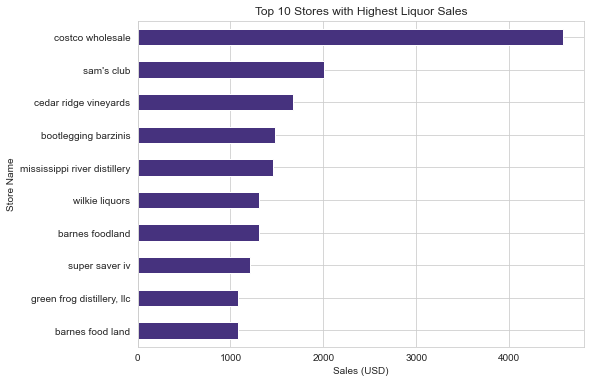

In [163]:
by_storename = df.groupby('store_name').mean()

plt.figure(figsize=(8, 6))
by_storename.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Stores with Highest Liquor Sales')
plt.ylabel('Store Name')
plt.xlabel('Sales (USD)')
plt.show();

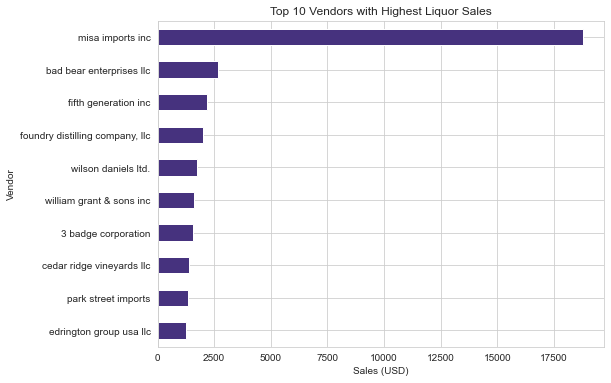

In [164]:
by_vendor = df.groupby('vendor_name').mean()

plt.figure(figsize=(8, 6))
by_vendor.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Vendors with Highest Liquor Sales')
plt.ylabel('Vendor')
plt.xlabel('Sales (USD)')
plt.show();

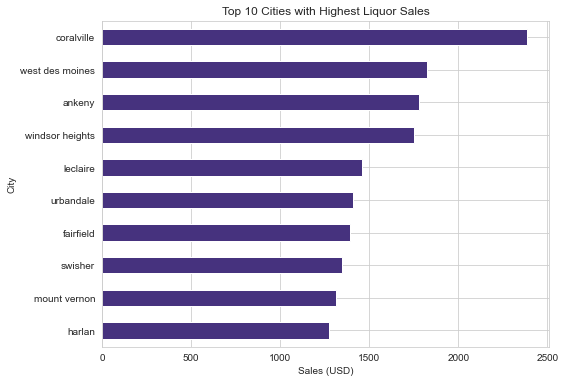

In [165]:
by_city = df.groupby('city').mean()

plt.figure(figsize=(8, 6))
by_city.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Cities with Highest Liquor Sales')
plt.ylabel('City')
plt.xlabel('Sales (USD)')
plt.show();

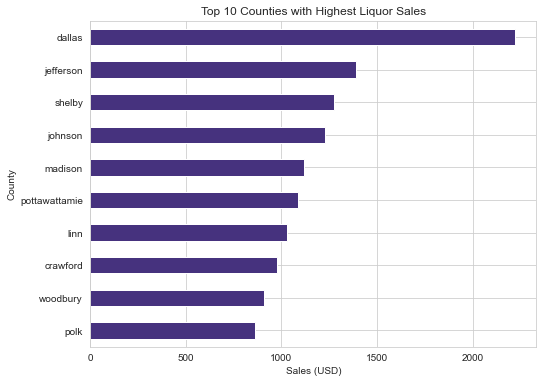

In [166]:
by_county = df.groupby('county').mean()

plt.figure(figsize=(8, 6))
by_county.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Counties with Highest Liquor Sales')
plt.ylabel('County')
plt.xlabel('Sales (USD)')
plt.show();

Highest store and vendor are in Templeton, which is located in Carroll county. But the highest sale based on county is Dallas when Carroll is second. Maybe because the price for 1 bottle is higher than other cities.

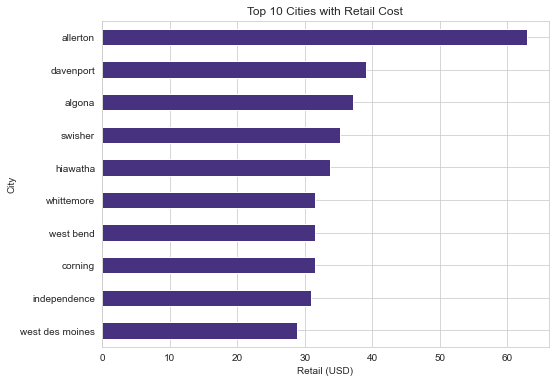

In [167]:
by_city = df.groupby('city').mean()

plt.figure(figsize=(8, 6))
by_city.sort_values('state_bottle_retail', ascending=True)['state_bottle_retail'].tail(10).plot(kind='barh')
plt.title('Top 10 Cities with Retail Cost')
plt.ylabel('City')
plt.xlabel('Retail (USD)')
plt.show();

Turns out Templeton's liquors are relatively not expensive.

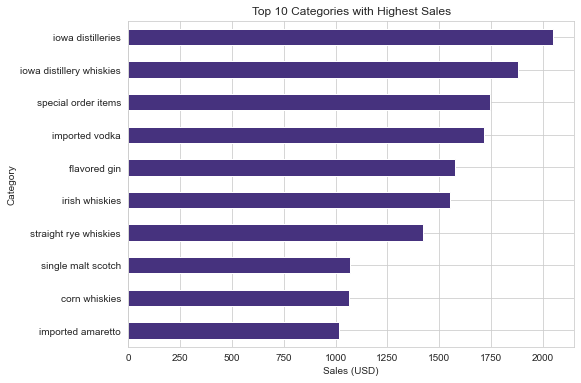

In [168]:
by_category = df.groupby('category_name').mean()

plt.figure(figsize=(8, 6))
by_category.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Categories with Highest Sales')
plt.ylabel('Category')
plt.xlabel('Sales (USD)')
plt.show();

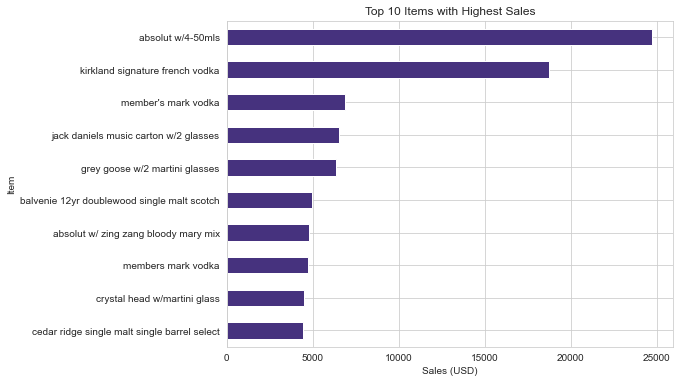

In [169]:
by_itemdesc = df.groupby('item_description').mean()

plt.figure(figsize=(8, 6))
by_itemdesc.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Items with Highest Sales')
plt.ylabel('Item')
plt.xlabel('Sales (USD)')
plt.show();

In [170]:
by_itemdesc.sort_values('sale_dollars', ascending=False).head(10)

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
item_description,,,,,,,,,,,,
absolut w/4-50mls,1.0,750.0,137.13,206.07,120.000000,24728.400000,90.000000,23.780000,2013.000000,10.000000,11.000000,4.000000
kirkland signature french vodka,6.0,1750.0,14.48,21.72,864.000000,18766.080000,1512.000000,399.425000,2018.000000,6.500000,17.000000,1.000000
member's mark vodka,6.0,1750.0,8.51,12.77,540.000000,6895.800000,945.000000,249.643333,2017.500000,8.166667,12.500000,1.666667
jack daniels music carton w/2 glasses,6.0,750.0,14.53,21.80,300.000000,6540.000000,225.000000,59.440000,2015.000000,3.000000,2.000000,0.000000
grey goose w/2 martini glasses,3.0,1750.0,35.42,53.13,120.000000,6375.600000,210.000000,55.480000,2015.000000,10.000000,15.000000,3.000000
balvenie 12yr doublewood single malt scotch,12.0,750.0,31.42,47.13,96.000000,4981.440000,72.000000,19.020000,2017.000000,12.000000,21.000000,3.000000
absolut w/ zing zang bloody mary mix,1.0,140000.0,1599.20,2398.80,2.000000,4797.600000,280.000000,73.970000,2014.000000,2.000000,26.000000,2.000000
members mark vodka,6.0,1750.0,8.51,12.77,370.666667,4733.413333,648.666667,171.353333,2019.333333,5.222222,17.555556,2.222222
crystal head w/martini glass,4.0,750.0,26.00,39.00,116.000000,4524.000000,87.000000,22.980000,2012.000000,11.000000,12.000000,0.000000


These are the top 10 most popular liquors in Iowa.

In [171]:
df.head().T

,0,1,2,3,4
store_name,3rd st convenience,central city,hy-vee,audubon food land,wal-mart
city,cedar rapids,des moines,sioux city,audubon,carroll
zip_code,52401,50314,51104,50025,51401
store_location,POINT (-91.666081 41.977896),POINT (-93.619787 41.60566),POINT (-96.417783 42.519886),POINT (-94.93625 41.723057),POINT (-94.893501 42.081312)
county,linn,polk,woodbury,audubon,carroll
category_name,decanters & specialty packages,irish whiskies,imported vodka,gold rum,decanters & specialty packages
vendor_name,pernod ricard usa,pernod ricard usa,moet hennessy usa,luxco inc,jim beam brands
item_description,the glenlivet w/50ml 15yr & 18yr,jameson,belvedere vodka,paramount gold rum,pinnacle w/3-50mls
pack,6,12,6,6,6
bottle_volume_ml,850,1000,1000,1750,750


<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

# Build a Regression Model

From the cleaned data that we have, we will try to build a simple regression model based on the `state_bottle_retail`.

In [172]:
import pandas as pd

df = pd.read_csv('data-cleaned.csv')
df.head()

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
0,3rd st convenience,cedar rapids,52401,POINT (-91.666081 41.977896),linn,decanters & specialty packages,pernod ricard usa,the glenlivet w/50ml 15yr & 18yr,6,850,20.99,32.24,2,64.48,1.70,0.45,2014,10,27,0
1,central city,des moines,50314,POINT (-93.619787 41.60566),polk,irish whiskies,pernod ricard usa,jameson,12,1000,17.40,26.10,60,1566.00,60.00,15.85,2012,10,15,0
2,hy-vee,sioux city,51104,POINT (-96.417783 42.519886),woodbury,imported vodka,moet hennessy usa,belvedere vodka,6,1000,20.63,30.95,2,185.70,2.00,0.52,2016,8,31,2
3,audubon food land,audubon,50025,POINT (-94.93625 41.723057),audubon,gold rum,luxco inc,paramount gold rum,6,1750,7.84,11.76,3,11.76,5.25,1.38,2016,8,29,0
4,wal-mart,carroll,51401,POINT (-94.893501 42.081312),carroll,decanters & specialty packages,jim beam brands,pinnacle w/3-50mls,6,750,7.01,10.52,18,189.36,13.50,3.57,2013,12,5,3


The attributes for the training are `store_name`, `city`, `county`, `category_name`, `vendor_name`, `item_description`, `pack`, `bottle_volume_ml`, `state_bottle_cost`, `month`, `day`, `day_of_week`.

In [173]:
data = df[['store_name', 'city', 'county', 'category_name', 'vendor_name', 'item_description', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'month', 'day', 'day_of_week', 'state_bottle_retail']]
data.head()

,store_name,city,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,month,day,day_of_week,state_bottle_retail
0,3rd st convenience,cedar rapids,linn,decanters & specialty packages,pernod ricard usa,the glenlivet w/50ml 15yr & 18yr,6,850,20.99,10,27,0,32.24
1,central city,des moines,polk,irish whiskies,pernod ricard usa,jameson,12,1000,17.40,10,15,0,26.10
2,hy-vee,sioux city,woodbury,imported vodka,moet hennessy usa,belvedere vodka,6,1000,20.63,8,31,2,30.95
3,audubon food land,audubon,audubon,gold rum,luxco inc,paramount gold rum,6,1750,7.84,8,29,0,11.76
4,wal-mart,carroll,carroll,decanters & specialty packages,jim beam brands,pinnacle w/3-50mls,6,750,7.01,12,5,3,10.52


**Check missing values**

In [174]:
df.isna().sum()

store_name             0
city                   0
zip_code               0
store_location         0
county                 0
category_name          0
vendor_name            0
item_description       0
pack                   0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
year                   0
month                  0
day                    0
day_of_week            0
dtype: int64

**Categorical variables**

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2061 non-null   object 
 1   city                 2061 non-null   object 
 2   county               2061 non-null   object 
 3   category_name        2061 non-null   object 
 4   vendor_name          2061 non-null   object 
 5   item_description     2061 non-null   object 
 6   pack                 2061 non-null   int64  
 7   bottle_volume_ml     2061 non-null   int64  
 8   state_bottle_cost    2061 non-null   float64
 9   month                2061 non-null   int64  
 10  day                  2061 non-null   int64  
 11  day_of_week          2061 non-null   int64  
 12  state_bottle_retail  2061 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 209.4+ KB


There is still a problem. To feed the data into a regression model, it needs to be in numerical. So to solve this problem, we need to convert the object attributes into categorical.

In [176]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

store_name
city
county
category_name
vendor_name
item_description


In [177]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   store_name           2061 non-null   category
 1   city                 2061 non-null   category
 2   county               2061 non-null   category
 3   category_name        2061 non-null   category
 4   vendor_name          2061 non-null   category
 5   item_description     2061 non-null   category
 6   pack                 2061 non-null   int64   
 7   bottle_volume_ml     2061 non-null   int64   
 8   state_bottle_cost    2061 non-null   float64 
 9   month                2061 non-null   int64   
 10  day                  2061 non-null   int64   
 11  day_of_week          2061 non-null   int64   
 12  state_bottle_retail  2061 non-null   float64 
dtypes: category(6), float64(2), int64(5)
memory usage: 174.0 KB


In [179]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes

In [180]:
data.head()

,store_name,city,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,month,day,day_of_week,state_bottle_retail
0,2,32,52,20,39,379,6,850,20.99,10,27,0,32.24
1,53,54,71,33,39,205,12,1000,17.40,10,15,0,26.10
2,118,161,92,30,34,52,6,1000,20.63,8,31,2,30.95
3,21,13,3,23,28,291,6,1750,7.84,8,29,0,11.76
4,290,29,12,20,23,309,6,750,7.01,12,5,3,10.52


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2061 non-null   int16  
 1   city                 2061 non-null   int16  
 2   county               2061 non-null   int8   
 3   category_name        2061 non-null   int8   
 4   vendor_name          2061 non-null   int8   
 5   item_description     2061 non-null   int16  
 6   pack                 2061 non-null   int64  
 7   bottle_volume_ml     2061 non-null   int64  
 8   state_bottle_cost    2061 non-null   float64
 9   month                2061 non-null   int64  
 10  day                  2061 non-null   int64  
 11  day_of_week          2061 non-null   int64  
 12  state_bottle_retail  2061 non-null   float64
dtypes: float64(2), int16(3), int64(5), int8(3)
memory usage: 131.0 KB


**Split into train and test sets**

In [182]:
X = data.drop('state_bottle_retail', axis=1)
y = data['state_bottle_retail']

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
len(X_train), len(X_test)

(1442, 619)

**Train the model**

We will compare 2 regression models: linear regression and random forest regression.
* Linear regression

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lr = LinearRegression(n_jobs=1)

In [188]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [189]:
lr_preds = lr.predict(X_test)

In [190]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, lr_preds):.5f}')
print(f'MSE: {mean_squared_error(y_test, lr_preds):.5f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):.5f}')

MAE: 0.01311
MSE: 0.00348
RMSE: 0.05901


In [191]:
lr_preds = pd.Series(lr_preds)
y_test = y_test.reset_index(drop=True)

pd.DataFrame({'true_label':y_test, 'predicted_label':lr_preds})

,true_label,predicted_label
0,29.94,29.951361
1,5.07,5.078537
2,29.97,29.979516
3,13.50,13.505514
4,11.43,11.428756
...,...,...
614,11.02,11.026120
615,27.13,27.131936
616,8.13,8.139750
617,6.69,6.692524


* Random forest regression

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rf = RandomForestRegressor()

In [194]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [195]:
rf_preds = rf.predict(X_test)

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, rf_preds):.5f}')
print(f'MSE: {mean_squared_error(y_test, rf_preds):.5f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds)):.5f}')

MAE: 0.18950
MSE: 9.04897
RMSE: 3.00815


In [197]:
rf_preds = pd.Series(rf_preds)
y_test = y_test.reset_index(drop=True)

pd.DataFrame({'true_label':y_test, 'predicted_label':rf_preds})

,true_label,predicted_label
0,29.94,29.9591
1,5.07,5.0182
2,29.97,29.9909
3,13.50,13.5070
4,11.43,11.4300
...,...,...
614,11.02,11.0200
615,27.13,27.1300
616,8.13,8.1300
617,6.69,6.6846


In [198]:
print(pd.DataFrame({'true_label':y_test,
                    'predicted_label_lr':lr_preds,
                    'predicted_label_rf':rf_preds}).head(10))

print(f'RMSE_lr: {np.sqrt(mean_squared_error(y_test, lr_preds)):.5f}')
print(f'RMSE_rf: {np.sqrt(mean_squared_error(y_test, rf_preds)):.5f}')

   true_label  predicted_label_lr  predicted_label_rf
0       29.94           29.951361             29.9591
1        5.07            5.078537              5.0182
2       29.97           29.979516             29.9909
3       13.50           13.505514             13.5070
4       11.43           11.428756             11.4300
5        7.28            7.286684              7.2800
6       22.49           22.496828             22.4900
7       15.00           15.011822             14.9938
8       63.00           63.015294             62.7328
9        8.31            8.316124              8.3128
RMSE_lr: 0.05901
RMSE_rf: 3.00815


Looks like out of the two models with no hyperparameter tuning, our linear regression model performs better. Let's save this model.

In [199]:
import joblib

joblib.dump(lr, 'lr_model.joblib')

['lr_model.joblib']

<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

# Test on Brand New Data

Now that we have built our model, what if we want to predict a brand new data that the machine has never seen before?

In [200]:
import os
from google.cloud import bigquery

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'D:/mlearning-proj/project/exploring-iowa-liquor-sales/Thinkmatch-proj-eb4ed729aecb.json'

In [201]:
client = bigquery.Client()

We will get more or less 600 random samples from the original dataset.

In [202]:
QUERY = (
    'SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` '
    'WHERE rand() <= .00003')
query_job = client.query(QUERY)

In [203]:
df = query_job.to_dataframe()
len(df)

612

In [204]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S09005900001,2012-11-16,4285,Fareway Stores #922 / New Hampton,102 S WATER AVE,NEW HAMPTON,50659,POINT (-92.312904 43.058019),19,Chickasaw,...,27102,Templeton Rye,6,750,18.08,27.13,12,325.56,9.00,2.38
1,S27585000022,2015-08-27,2515,Hy-Vee Food Store #1 / Mason City,2400 4TH ST SW,MASON CITY,50401,POINT (-93.235588 43.148451),17,Cerro Gordo,...,36908,Mccormick Vodka Pet,6,1750,7.47,11.21,6,67.26,10.50,2.77
2,S27253800059,2015-08-11,2544,Hy-Vee Food Store / Marshalltown,802 SOUTH CENTER,MARSHALLTOWN,50158,POINT (-92.912817 42.039205),64,Marshall,...,36301,Hawkeye Vodka 80 Prf Mini,12,500,3.73,5.60,2,11.20,1.00,0.26
3,S22865900143,2014-12-10,3820,"Charlie's Wine and Spirits,",507 W 19th St,SIOUX CITY,51103,POINT (-96.420193 42.510535),97,Woodbury,...,73702,Evan Williams Honey,12,750,6.94,10.91,5,54.55,3.75,0.99
4,S20010400087,2014-07-09,3952,Lot-A-Spirits,3780 STATE ST,BETTENDORF,52722,POINT (-90.48065 41.529655),82,Scott,...,64615,Jose Cuervo Cinge,12,750,10.58,15.87,2,31.74,1.50,0.40


Because this is a brand new data, we have to do preprocessing like we did in our data model so that it will perfectly match with our model. All of them. 

**Preprocessing**

* Drop missing values

In [205]:
df.dropna(inplace=True)

* Extract year, month, day, and dayofweek from `date`

In [206]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['day_of_week'] = df['date'].apply(lambda x: x.dayofweek)

* Drop some attributes

In [207]:
df.drop(['invoice_and_item_number',
          'date',
          'store_number',
          'address',
          'county_number',
          'category',
          'vendor_number',
          'item_number'], axis=1, inplace=True)

* Lowercase some attributes

In [208]:
df['city'] = df['city'].str.lower()
df['county'] = df['county'].str.lower()
df['category_name'] = df['category_name'].str.lower()
df['item_description'] = df['item_description'].str.lower()

* Deal with `store_name`

In [209]:
df['store_name'] = df['store_name'].str.lower()
df['store_name'] = df['store_name'].str.split(' / ').str[0]
df['store_name'] = df['store_name'].str.split('/').str[0]
df['store_name'] = df['store_name'].str.split(' #').str[0]

In [210]:
df['store_name'].loc[df.store_name.str.contains('hy-vee')] = 'hy-vee'
df['store_name'].loc[df.store_name.str.contains('central city')] = 'central city'
df['store_name'].loc[df.store_name.str.contains("sam's club")] = "sam's club"
df['store_name'].loc[df.store_name.str.contains('wal-mart')] = 'wal-mart'
df['store_name'].loc[df.store_name.str.contains('target')] = 'target'
df['store_name'].loc[df.store_name.str.contains('world liquor')] = 'world liquor & tobacco + vape'

* Deal with `vendor_name`

In [211]:
df['vendor_name'] = df['vendor_name'].str.lower()

df['vendor_name'].loc[df.vendor_name.str.contains('luxco')] = 'luxco inc'
df['vendor_name'].loc[df.vendor_name.str.contains('pernod ricard usa')] = 'pernod ricard usa'
df['vendor_name'].loc[df.vendor_name.str.contains('gunsandmore')] = 'gunsandmore'
df['vendor_name'].loc[df.vendor_name.str.contains('mccormick distilling')] = 'mccormick distilling co'
df['vendor_name'].loc[df.vendor_name.str.contains('sazerac')] = 'sazerac company  inc'
df['vendor_name'].loc[df.vendor_name.str.contains('mississippi river')] = 'mississippi river distilling co'
df['vendor_name'].loc[df.vendor_name.str.contains('phillips beverage')] = 'phillips beverage company'
df['vendor_name'].loc[df.vendor_name.str.contains('constellation')] = 'constellation wine company'
df['vendor_name'].loc[df.vendor_name.str.contains('william grant')] = 'william grant & sons inc'
df['vendor_name'].loc[df.vendor_name.str.contains('cedar ridge vineyards')] = 'cedar ridge vineyards llc'
df['vendor_name'].loc[df.vendor_name.str.contains('prestige wine')] = 'prestige wine & spirits group'
df['vendor_name'].loc[df.vendor_name.str.contains('ole smoky')] = 'ole smoky distillery'
df['vendor_name'].loc[df.vendor_name.str.contains('laird')] = 'laird & company'
df['vendor_name'].loc[df.vendor_name.str.contains('gallo winery')] = 'e & j gallo winery'
df['vendor_name'].loc[df.vendor_name.str.contains('s&b farms')] = 's&b farms distillery'
df['vendor_name'].loc[df.vendor_name.str.contains('fifth generation')] = 'fifth generation inc'
df['vendor_name'].loc[df.vendor_name.str.contains('yahara bay distillers')] = 'yahara bay distillers inc'
df['vendor_name'].loc[df.vendor_name.str.contains('bacardi')] = 'bacardi usa inc'
df['vendor_name'].loc[df.vendor_name.str.contains('forman')] = 'brown-forman corporation'
df['vendor_name'].loc[df.vendor_name.str.contains('dunkel corporation')] = 'dunkel corporation'

* Deal with categorical variables

In [212]:
data = df[['store_name', 'city', 'county', 'category_name', 'vendor_name', 'item_description', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'month', 'day', 'day_of_week', 'state_bottle_retail']]

In [213]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [214]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes

* And lastly, drop the label column

In [215]:
data.drop('state_bottle_retail', axis=1, inplace=True)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 611
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store_name         556 non-null    int16  
 1   city               556 non-null    int16  
 2   county             556 non-null    int8   
 3   category_name      556 non-null    int8   
 4   vendor_name        556 non-null    int8   
 5   item_description   556 non-null    int16  
 6   pack               556 non-null    int64  
 7   bottle_volume_ml   556 non-null    int64  
 8   state_bottle_cost  556 non-null    float64
 9   month              556 non-null    int64  
 10  day                556 non-null    int64  
 11  day_of_week        556 non-null    int64  
dtypes: float64(1), int16(3), int64(5), int8(3)
memory usage: 35.3 KB


Our test data is now ready. Let's load our saved model.

**Load saved model**

In [217]:
import joblib

model = joblib.load('lr_model.joblib')

**Predict**

In [218]:
preds = model.predict(data)

In [219]:
preds = pd.Series(preds)

In [220]:
pd.DataFrame({'true_label':df['state_bottle_retail'], 'predicted_label':preds}).head()

,true_label,predicted_label
0,27.13,27.133208
1,11.21,11.213200
2,5.60,5.604862
3,10.91,10.420540
4,15.87,15.876299
